# `Machine Learning ZoomCamp`
## `HW1_Chapter 5: Deployment`

### Aileah Gotladera
-----------------------------------

In [1]:
import pandas as pd
import numpy as np
import pickle
import requests

In [4]:
# Load the data
file = 'C:/Users/LXPH/OneDrive - Lexcode/Documents/ML ZoomCamp/Data/Homework/ch5_Bank.csv'
data = pd.read_csv(file, sep=';')
print(data.shape)
data.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## **`Q1`**

In [5]:
!pipenv --version

pipenv, version 2023.10.3


## **`Q2`**
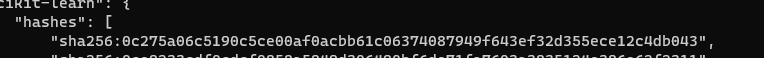

In [6]:
"sha256:0c275a06c5190c5ce00af0acbb61c06374087949f643ef32d355ece12c4db043"

'sha256:0c275a06c5190c5ce00af0acbb61c06374087949f643ef32d355ece12c4db043'

## **`Q3`**

In [7]:
# PREFIX="https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework"
# !wget $PREFIX/model1.bin
# !wget $PREFIX/dv.bin

In [8]:
PREFIX = "https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework"
files_to_download = ["model1.bin", "dv.bin"]

for file in files_to_download:
    url = f"{PREFIX}/{file}"
    response = requests.get(url)

    if response.status_code == 200:
        with open(file, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded: {file}")
    else:
        print(f"Failed to download: {url}")

Downloaded: model1.bin
Downloaded: dv.bin


In [9]:
# Write a script for loading these models with pickle
with open("model1.bin", "rb") as fin:
    model = pickle.load(fin)

with open("dv.bin", "rb") as fin:
    dv = pickle.load(fin)

C:\Users\LXPH\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\LXPH\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.3.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
client = {"job": "retired", "duration": 445, "poutcome": "success"}
X = dv.transform(client)
model.predict_proba(X)

array([[0.09806907, 0.90193093]])

In [11]:
print('Q3 Answer: 0.901')

Q3 Answer: 0.901


## **`Q4`**

In [14]:
!pip install Flask
!pip install waitress

  Obtaining dependency information for Flask from https://files.pythonhosted.org/packages/36/42/015c23096649b908c809c69388a805a571a3bea44362fe87e33fc3afa01f/flask-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for Werkzeug>=3.0.0 from https://files.pythonhosted.org/packages/b6/a5/54b01f663d60d5334f6c9c87c26274e94617a4fd463d812463626423b10d/werkzeug-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker>=1.6.2 from https://files.pythonhosted.org/packages/bf/2b/11bcedb7dee4923253a4a21bae3be854bcc4f06295bd827756352016d97c/blinker-1.6.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/99.7 kB ? eta -:--:--
   ------------ --------------------------- 30.7/99.7 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 99.7/99.7 kB 1.4 MB/s eta 0:00:00
Using cached werkzeug-3.0.0-py3-none-any.whl (226 kB)
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------- --------------------------

In [14]:
import requests

url = "http://127.0.0.1:5000/predict"  # Use the appropriate route
client_data = {"job": "unknown", "duration": 270, "poutcome": "failure"}

response = requests.post(url, json=client_data)

if response.status_code == 200:
    data = response.json()
    churn_probability = data.get("churn_probability")
    print(f"Churn Probability: {churn_probability}")
else:
    print("Failed to make the prediction.")


Churn Probability: 0.13968947052356817


## **`Q5`**
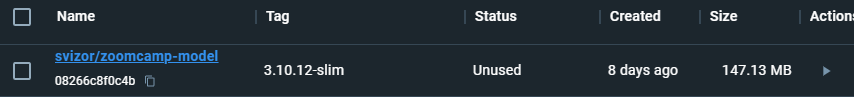

In [15]:
print('Q5 Answer: 147MB')

Q5 Answer: 147MB


## **`Q6`**

In [16]:
print('Q6 Answer: 0.902')

Q6 Answer: 0.902
